# Crime in Tucson Exploration Project


## Importing data from Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

crime_file = '/content/drive/My Drive/final_project_datasets/Tucson_Police_Reported_Crimes.csv'

# Load the CSV
df = pd.read_csv(crime_file)

# Display the first few rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,IncidentID,DateOccurred,Year,Month,Day,TimeOccur,Division,Ward,UCR,UCRDescription,Offense,OffenseDescription,CallSource,ESRI_OID
0,1800330010,2018/03/30 00:00:00+00,2018,March,Fri,2054,Midtown,6.0,5,05 - BURGLARY,501,Burglary - Force,NaN,1
1,807190154,2018/06/15 00:00:00+00,2018,June,Fri,0243,South,1.0,1,01 - HOMICIDE,101,Criminal Homicide - Murder,NaN,2
2,1801010138,2018/01/01 00:00:00+00,2018,January,Mon,0412,Midtown,3.0,3,03 - ROBBERY,304,Robbery - Convenience Stores,Call For Service,3
3,1801010111,2018/01/01 00:00:00+00,2018,January,Mon,0324,South,1.0,4,"04 - ASSAULT, AGGRAVATED",413,Aggravated Assault - Domestic Violence (DV),Call For Service,4
4,1801010244,2018/01/01 00:00:00+00,2018,January,Mon,0950,South,5.0,6,06 - LARCENY,610,Larceny - All Other,Call For Service,5


## Hypothesis 1: Crime rates are higher during nighttime than daytime.

The first hypothesis we want to explore would be if crime rates are higher during the night as opposed to the daytime. We will explore this using pandas to manipulate the data, and using matplotlib and seaborn to graph our findings.

In [ ]:
# Necessary imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the data into a pandas dataframe
crime_data = pd.read_csv(crime_file)
print(crime_data.head())

   IncidentID            DateOccurred  Year    Month  Day TimeOccur Division  \
0  1800330010  2018/03/30 00:00:00+00  2018    March  Fri      2054  Midtown   
1   807190154  2018/06/15 00:00:00+00  2018     June  Fri      0243    South   
2  1801010138  2018/01/01 00:00:00+00  2018  January  Mon      0412  Midtown   
3  1801010111  2018/01/01 00:00:00+00  2018  January  Mon      0324    South   
4  1801010244  2018/01/01 00:00:00+00  2018  January  Mon      0950    South   

   Ward  UCR            UCRDescription  Offense  \
0   6.0    5             05 - BURGLARY      501   
1   1.0    1             01 - HOMICIDE      101   
2   3.0    3              03 - ROBBERY      304   
3   1.0    4  04 - ASSAULT, AGGRAVATED      413   
4   5.0    6              06 - LARCENY      610   

                            OffenseDescription        CallSource  ESRI_OID  
0                             Burglary - Force               NaN         1  
1                   Criminal Homicide - Murder            

We need to find out what format the TimeOccur column is in.

In [ ]:
# Check the structure of the timestamp column
print(crime_data['TimeOccur'].head())

0    2054
1    0243
2    0412
3    0324
4    0950
Name: TimeOccur, dtype: object


We see that the TimeOccur column is in military time format, in this case, a 4 digit string in which anything after 12 PM is added as an extra hour until the clock hits 2400, which is then set to 0000 to represent a new day.

In [ ]:
# Make sure that the elements in TimeOccur are read in as strings.
crime_data['TimeOccur'] = crime_data['TimeOccur'].astype(str)
crime_data['TimeOccur'].head()

,TimeOccur
0,2054
1,0243
2,0412
3,0324
4,0950


In [ ]:
# Convert the timestamp into Hours and Minutes
crime_data['TimeOccur'] = pd.to_datetime(crime_data['TimeOccur'], format='%H%M', errors='coerce').dt.time
crime_data['TimeOccur'].head()

,TimeOccur
0,20:54:00
1,02:43:00
2,04:12:00
3,03:24:00
4,09:50:00


Now that we have the time the crimes occured in a useable format, we can now categorize the times based on the hour. The way we have it set up, is that any crimes committed between 6 AM inclusive and 6 PM exclusive are categiorized as Daytime crimes, Nighttime otherwise.

In [ ]:
# Categorize the time of day using the hour
def categorize_time_of_day(time):
    if 6 <= time.hour < 18:
        return 'Daytime'
    else:
        return 'Nighttime'

# Apply the function to the TimeOccur column
crime_data['TimeCategory'] = crime_data['TimeOccur'].apply(categorize_time_of_day)

In [ ]:
# Verify the procesed data
# Extract hour and minute from TimeOccur column
crime_data['hour'] = crime_data['TimeOccur'].apply(lambda x: x.hour if x else None) # Extract hour if TimeOccur is not None
crime_data['minute'] = crime_data['TimeOccur'].apply(lambda x: x.minute if x else None) # Extract minute if TimeOccur is not None

# Now you can print the desired columns
print(crime_data[['TimeOccur', 'hour', 'minute', 'TimeCategory']].head())

  TimeOccur  hour  minute TimeCategory
0  20:54:00  20.0    54.0    Nighttime
1  02:43:00   2.0    43.0    Nighttime
2  04:12:00   4.0    12.0    Nighttime
3  03:24:00   3.0    24.0    Nighttime
4  09:50:00   9.0    50.0      Daytime


Here we count the crimes that occur in either the daytime or the nighttime.

In [ ]:
# Count crimes by time of day
crime_counts = crime_data['TimeCategory'].value_counts()
print(crime_counts)

TimeCategory
Nighttime    99940
Daytime      81748
Name: count, dtype: int64


As presented by the two numbers above, there is a significant disparity between the number of crimes committed during the Nighttime and Daytime. Now we are going to plot the data to get a better understanding.

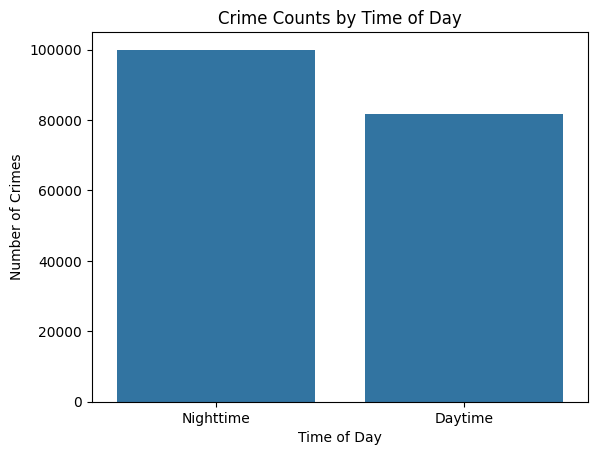

In [ ]:
# We ue seaborn and matplotlib to plot the crime data.
sns.barplot(x=crime_counts.index, y=crime_counts.values)
plt.title('Crime Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes')
plt.show()

Very interesting! However, let's dig a little bit deeper to try and better understand this dataset than the basic counting of the crimes. To do this, we will be using Seaborn to create a visiualization and plot the crimes throughout the day.

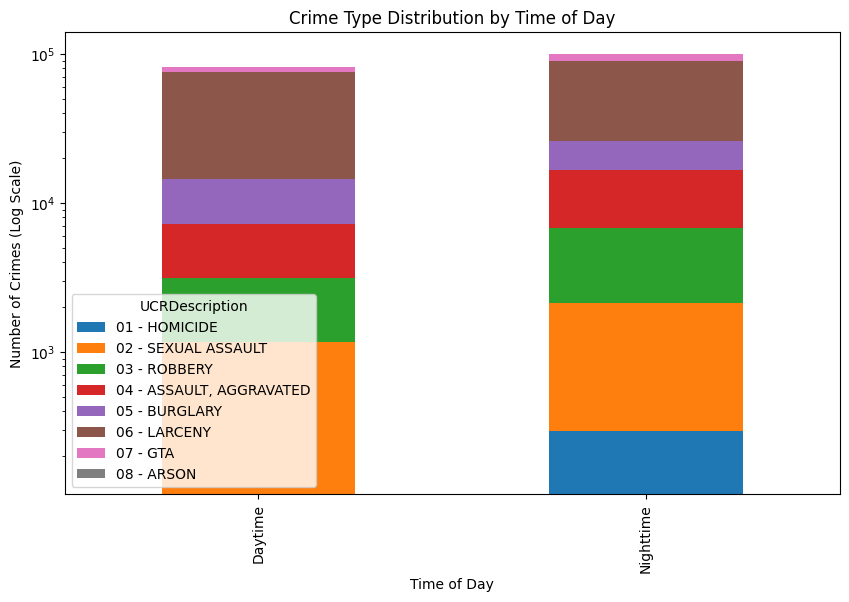

In [ ]:
# Create the visualization in seaborn
crime_type_counts = crime_data.groupby(['TimeCategory', 'UCRDescription']).size().unstack()
crime_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.yscale('log')

# Set labels and title
plt.title('Crime Type Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes (Log Scale)')
plt.show()

Heatmap of Crime Hour Distribution

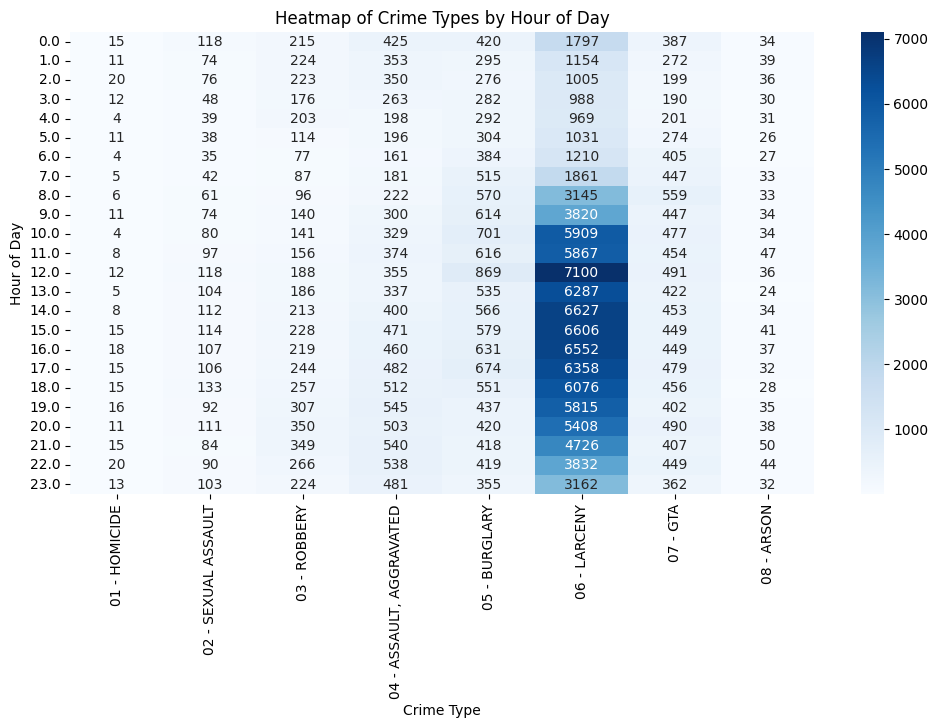

In [ ]:
crime_type_hour = crime_data.groupby([crime_data['hour'], 'UCRDescription']).size().unstack()
#crime_type_hour

plt.figure(figsize=(12, 6))
sns.heatmap(crime_type_hour, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Crime Types by Hour of Day')
plt.xlabel('Crime Type')
plt.ylabel('Hour of Day')
plt.show()

## Hypothesis 2: Schools and Parks vs Crime Levels

Our second hypothesis is areas with more parks and schools will have lower crime rates

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load relevent csv files
crime = pd.read_csv('/content/drive/MyDrive/final_project_datasets/Tucson_Police_Arrests_2021.csv')
parks = pd.read_csv('/content/drive/MyDrive/final_project_datasets/Parks.csv')
schools = pd.read_csv('/content/drive/MyDrive/final_project_datasets/Schools.csv')

Since we will be analyzing the data by zip codes, we first clean the data by removing all rows without a zip code.

In [ ]:
# Remove all cells with NaN in its zip column
crime = crime[crime['zip'] != '']
parks = parks[parks['ZIP'] != '']
schools = schools[schools['ZIP'] != '']

We then get dataframes containing the crime counts, park counts, and school counts by zip code

In [ ]:
crime_counts = crime.groupby('zip').size().reset_index(name='crime_count')
park_counts = parks.groupby('ZIP').size().reset_index(name='park_count')
school_counts = schools.groupby('ZIP').size().reset_index(name='school_count')

# Drop and clean bad data
crime_counts = crime_counts.drop(index=0).reset_index(drop=True)
park_counts = park_counts.drop(index=3).reset_index(drop=True)
crime_counts.rename(columns={'zip':'ZIP'}, inplace=True)

# Convert ZIP columns to int
crime_counts['ZIP'] = crime_counts['ZIP'].astype(int)
park_counts['ZIP'] = park_counts['ZIP'].astype(int)
school_counts['ZIP'] = school_counts['ZIP'].astype(int)

We then merge the three dataframes into one

In [ ]:
# Merge the three data sets
combined_counts = pd.merge(crime_counts, park_counts, on='ZIP', how='inner')
combined_counts = pd.merge(combined_counts, school_counts, on='ZIP', how='inner')

#more cleaning, dropping outliers and duplicates
combined_counts = combined_counts.drop(index=8).reset_index(drop=True)
combined_counts = combined_counts.drop(index=3).reset_index(drop=True)
combined_counts = combined_counts.drop(index=3).reset_index(drop=True)
combined_counts = combined_counts.drop(index=16).reset_index(drop=True)

combined_counts

,ZIP,crime_count,park_count,school_count
0,85701,1365,21,7
1,85705,6305,19,28
2,85706,2711,9,22
3,85710,3090,12,24
4,85711,4727,20,22
5,85712,2785,8,14
6,85713,4687,19,21
7,85714,1745,10,5
8,85715,631,6,4
9,85716,2410,14,14


Scatter plots showing the relationship between Crime vs Schools and Crime vs Parks

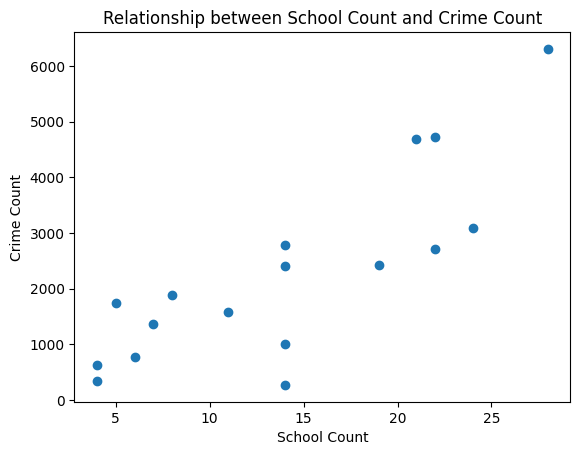

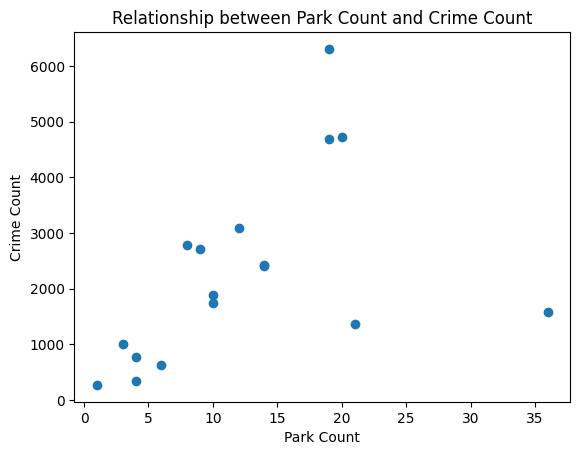

In [ ]:
plt.scatter(combined_counts['school_count'], combined_counts['crime_count'])
plt.xlabel('School Count')
plt.ylabel('Crime Count')
plt.title('Relationship between School Count and Crime Count')
plt.show()

plt.scatter(combined_counts['park_count'], combined_counts['crime_count'])
plt.xlabel('Park Count')
plt.ylabel('Crime Count')
plt.title('Relationship between Park Count and Crime Count')
plt.show()

In order to make comparisons, we normalize the data using Min-Max scaling and create a bar plot

In [ ]:
normalized_counts = combined_counts.copy()

for column in ["crime_count", "park_count", "school_count"]:
    min = combined_counts[column].min()
    max = combined_counts[column].max()
    normalized_counts[column] = (combined_counts[column] - min) / (max - min)

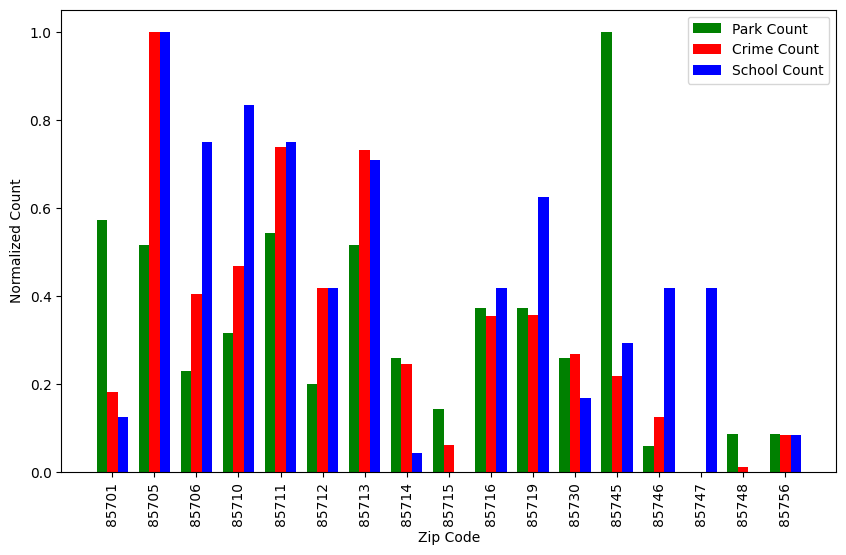

In [ ]:
plt.figure(figsize=(10, 6))
x = np.arange(len(normalized_counts['ZIP']))

plt.bar(x-0.25, normalized_counts['park_count'], label="Park Count", color='green', width = 0.25)
plt.bar(x, normalized_counts['crime_count'], label='Crime Count', color='red', width = 0.25)
plt.bar(x+0.25, normalized_counts['school_count'], label='School Count', color='blue', width = 0.25)

plt.xticks(x, normalized_counts['ZIP'], rotation='vertical')
plt.legend()

plt.xlabel('Zip Code')
plt.ylabel('Normalized Count')

plt.show()

According to our hypothesis, we would expect a negative correlation between crime count and park count, and crime count and school count. However, the scatter plots indicate that crime rates tend to be higher in zip codes with more parks and schools. The bar plot indicates that in many zip codes, there is a relatively even ratio of crime, parks, and schools with some exceptions such as 85701 and 85745 having a high number of parks with low crime numbers. 85747 is also notable with many schools but very little crime.

# Hypothesis 3: Street lighting and Crime

Our third and final hypothesis supposes that areas with more visibility and light, such as from street lights, will see lower crime rates.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# arrests_file = '/content/drive/My Drive/final_project_datasets/Tucson_Police_Arrests_2021.csv'
# streetlight_file = '/content/drive/My Drive/final_project_datasets/streetlights-in-tucson-data.csv'
arrests_file = '/content/drive/My Drive/datasets/tucson-police-arrests-2021.csv'
streetlight_file = '/content/drive/My Drive/datasets/streetlights-in-tucson-data.csv'

# Load the streetlights data
streetlights_df = pd.read_csv(streetlight_file)

# Load the crime data
arrests_df = pd.read_csv(arrests_file)

Checking the heads of the streetlight and arrests data to understand how the positions are measured.

In [ ]:
streetlights_df.head()

,X,Y,OBJECTID,Model,Type,Bulb_Type,Wattage,Voltage,Address_Number,Street,...,Light_Fixture_Theme,DATASOURCE,Permit_Number,CartegraphID,SHAPE,Retired,Status,MacID,TEP_Account_Number,Power_Pedestal_ID
0,1.001233e+06,421018.579396,1,ATBM D R3,Autobahn,LED,95.0,480.0,5425.0,S Campbell Av,...,Other,TDOT_STREETLIGHTS,NaN,51,NaN,NaN,Active,00F14C41,3.710003e+09,514.0
1,1.001142e+06,420902.066601,2,ATBM D R3,Autobahn,LED,95.0,480.0,5434.0,S Campbell Av,...,Other,TDOT_STREETLIGHTS,NaN,52,NaN,NaN,Active,00F10A57,3.710003e+09,514.0
2,1.001234e+06,420785.376969,3,ATBM D R3,Autobahn,LED,95.0,480.0,5441.0,S Campbell Av,...,Other,TDOT_STREETLIGHTS,NaN,53,NaN,NaN,Active,00F16079,3.710003e+09,514.0
3,1.001143e+06,420667.403543,4,ATBM D R3,Autobahn,LED,95.0,480.0,5454.0,S Campbell Av,...,Other,TDOT_STREETLIGHTS,NaN,54,NaN,NaN,Active,00F10902,3.710003e+09,514.0
4,1.001237e+06,420582.028543,5,ATBM D R3,Autobahn,LED,95.0,480.0,5457.0,S Campbell Av,...,Other,TDOT_STREETLIGHTS,NaN,55,NaN,NaN,Active,00F15E6B,3.710003e+09,514.0


In [ ]:
arrests_df.head()

,OBJECTID,X,Y,arre_id,case_id,agency,date_arr,time_arr,datetime_arr,MONTH_ARR,...,LOC_STATUS,WARD,NHA_NAME,TMSECT,DIVISION,DIVISION_NO,DIVSECT,TRSQ,City_geo,ADDRESS_100BLK
0,1,9.900089e+05,470751.276735,2021000107,2101020104,TPD,2021/01/02 00:00:00+00,1731,2021/01/02 17:31:00+00,01-Jan,...,GEOCODED,3.0,NaN,NaN,Operations Division West,T2,T203,13S13E24NW,TUCSON,4598 N ORACLE RD
1,2,9.900089e+05,470751.276735,2021000107,2101020104,TPD,2021/01/02 00:00:00+00,1731,2021/01/02 17:31:00+00,01-Jan,...,GEOCODED,3.0,NaN,NaN,Operations Division West,T2,T203,13S13E24NW,TUCSON,4598 N ORACLE RD
2,3,9.900089e+05,470751.276735,2021000107,2101020104,TPD,2021/01/02 00:00:00+00,1731,2021/01/02 17:31:00+00,01-Jan,...,GEOCODED,3.0,NaN,NaN,Operations Division West,T2,T203,13S13E24NW,TUCSON,4598 N ORACLE RD
3,4,1.053154e+06,443419.380064,2021000110,2101020138,TPD,2021/01/02 00:00:00+00,1844,2021/01/02 18:44:00+00,01-Jan,...,GEOCODED,2.0,Eastside,NaN,Operations Division East,T4,T406,14S15E14NE,TUCSON,10198 E ESSEX VILLAGE DR
4,5,1.053154e+06,443419.380064,2021000110,2101020138,TPD,2021/01/02 00:00:00+00,1844,2021/01/02 18:44:00+00,01-Jan,...,GEOCODED,2.0,Eastside,NaN,Operations Division East,T4,T406,14S15E14NE,TUCSON,10198 E ESSEX VILLAGE DR


In [ ]:
arrests_df["X"].head()

,X
0,9.900089e+05
1,9.900089e+05
2,9.900089e+05
3,1.053154e+06
4,1.053154e+06


Looking at the coordinates, I'm unsure what coordinate reference system is being used. Looking into the meta data of the streetlights, I found the following information.

Reference system identifier:

- Value: 2868
- Code space: EPSG

I believe this points to coordinate system EPSG:2868, which refers to the NAD83 / Arizona Central (ft) coordinate reference system.

In [6]:
from pyproj import Transformer

In [7]:
# Defining transformer to convert coordinates

transformer = Transformer.from_crs("epsg:2868", "epsg:4326", always_xy=True)

In [8]:
def convert_to_latitude_longitude(x, y):
  longitude, latitude = transformer.transform(x, y)
  return latitude, longitude

In [9]:
# Converting streetlight and arrests data

streetlights_df[['latitude', 'longitude']] = streetlights_df.apply(
    lambda row: convert_to_latitude_longitude(row['X'], row['Y']), axis=1, result_type='expand'
)

arrests_df[['latitude', 'longitude']] = arrests_df.apply(
    lambda row: convert_to_latitude_longitude(row['X'], row['Y']), axis=1, result_type='expand'
)

In [ ]:
print(streetlights_df[["X", "Y", "latitude", "longitude"]].head())

              X              Y   latitude   longitude
0  1.001233e+06  421018.579396  32.153728 -110.943306
1  1.001142e+06  420902.066601  32.153410 -110.943603
2  1.001234e+06  420785.376969  32.153087 -110.943311
3  1.001143e+06  420667.403543  32.152765 -110.943608
4  1.001237e+06  420582.028543  32.152528 -110.943306


In [ ]:
print(arrests_df[["X", "Y", "latitude", "longitude"]].head())

              X              Y   latitude   longitude
0  9.900089e+05  470751.276735  32.290695 -110.978167
1  9.900089e+05  470751.276735  32.290695 -110.978167
2  9.900089e+05  470751.276735  32.290695 -110.978167
3  1.053154e+06  443419.380064  32.213893 -110.774793
4  1.053154e+06  443419.380064  32.213893 -110.774793


Comparing between the coordinates in the latitude 32 area and longitude -110 area and the coordinates displayed by Tucson's own map view, it seems like the coordinates are correct.

Now, I'm going to arrange the data into groups of 500 meters around each arrest to count how many streetlights were in the vicinity.

In [10]:
import geopandas as gpd
from shapely.geometry import Point

# Creating geometry columns to represent geographic points using latitude and longitude
streetlights_geometry = [Point(xy) for xy in zip(streetlights_df["longitude"], streetlights_df["latitude"])]
arrests_geometry = [Point(xy) for xy in zip(arrests_df['longitude'], arrests_df['latitude'])]

In [11]:
# Creating GeoDataFrames to use to perform spatial operations
streetlights_gdf = gpd.GeoDataFrame(streetlights_df, geometry=streetlights_geometry, crs="EPSG:4326")
arrests_gdf = gpd.GeoDataFrame(arrests_df, geometry=arrests_geometry, crs="EPSG:4326")

In [12]:
# Switching to a metric coordinate system because metric better :)
streetlights_gdf = streetlights_gdf.to_crs(epsg=3857)
arrests_gdf = arrests_gdf.to_crs(epsg=3857)

In [13]:
# Creating buffers (a circle zone) around each arrest point (500 meters)
arrests_gdf['buffer'] = arrests_gdf.geometry.buffer(500)
arrest_buffers_gdf = gpd.GeoDataFrame(arrests_gdf, geometry='buffer')

In [14]:
# Performing a spatial join to count how many streetlights are inside the zone
lights_within_buffer = gpd.sjoin(streetlights_gdf, arrest_buffers_gdf, how='inner', predicate='within')

In [15]:
# Counting the number of streetlights per arrest point
streetlight_counts = lights_within_buffer.groupby('index_right').size().reset_index(name='light_count')

In [16]:
# Merge the count data back to the arrests GeoDataFrame
arrests_gdf = arrests_gdf.merge(streetlight_counts, left_index=True, right_on='index_right', how='left')

# Fill NaN values with 0 (indicating no streetlights within the buffer)
arrests_gdf['light_count'] = arrests_gdf['light_count'].fillna(0)

# Display a few rows to check the results
print(arrests_gdf[['geometry', 'light_count']].head())

                              geometry  light_count
0.0  POINT (-12354033.069 3801529.638)         48.0
1.0  POINT (-12354033.069 3801529.638)         48.0
2.0  POINT (-12354033.069 3801529.638)         48.0
3.0  POINT (-12331393.558 3791420.244)         27.0
4.0  POINT (-12331393.558 3791420.244)         27.0


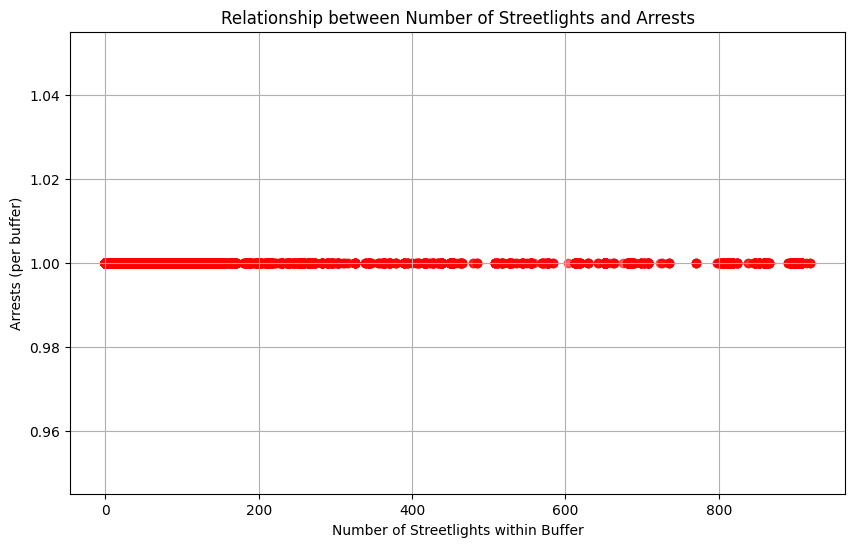

In [18]:
# We use 'light_count' to represent the number of streetlights within each buffer
x = arrests_gdf['light_count']
y = [1] * len(arrests_gdf)  # Since we have one arrest per buffer, the count for each is 1

# Scatter plot to visualize relationship
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='red')

plt.xlabel('Number of Streetlights within Buffer')
plt.ylabel('Arrests (per buffer)')
plt.title('Relationship between Number of Streetlights and Arrests')
plt.grid(True)
plt.show()

It looks like finding how many streetlights there were per each arrest point does not offer much information. Instead, I'm going to try to find how many arrests and streetlights there are in a gridcell assigned to coordinates of the city.

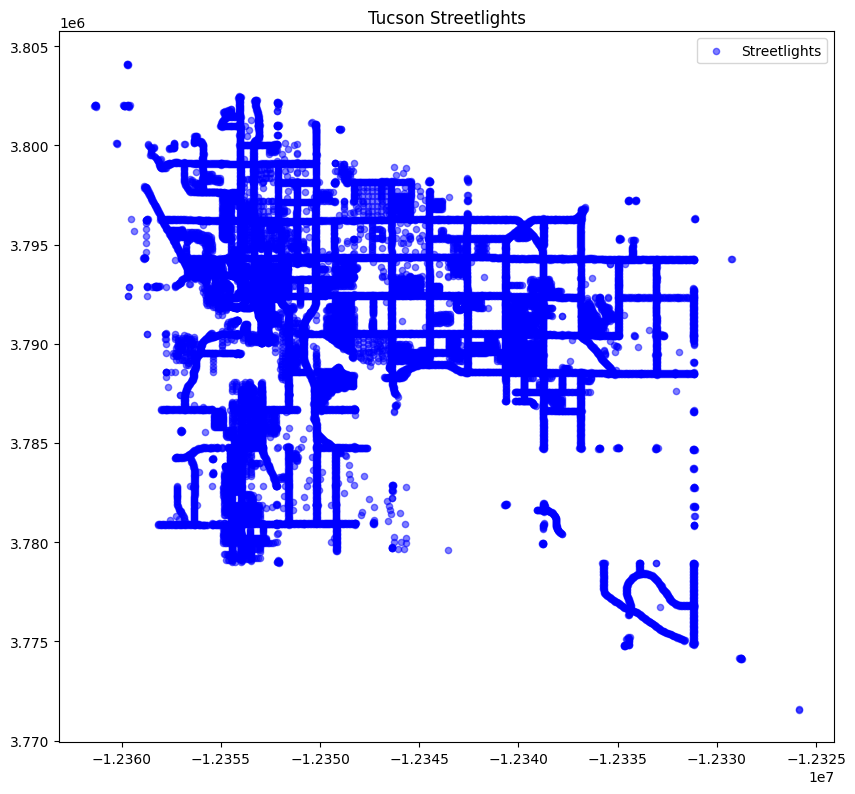

In [19]:
streetlights_gdf = streetlights_gdf.to_crs(epsg=3857)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot streetlights only
streetlights_gdf.plot(ax=ax, color='blue', markersize=20, alpha=0.5, label='Streetlights')

# Set the aspect ratio to equal to ensure consistent scaling
ax.set_aspect('equal')

plt.title('Tucson Streetlights')
plt.legend()
plt.show()

By plotting the streetlights, I verified that my streetlight coordiates are
properly set as I can easily distinguish the streets the streetlights are on as
well as major hot spots for streetlights. Next, I plot the arrests alongside the
streetlights.

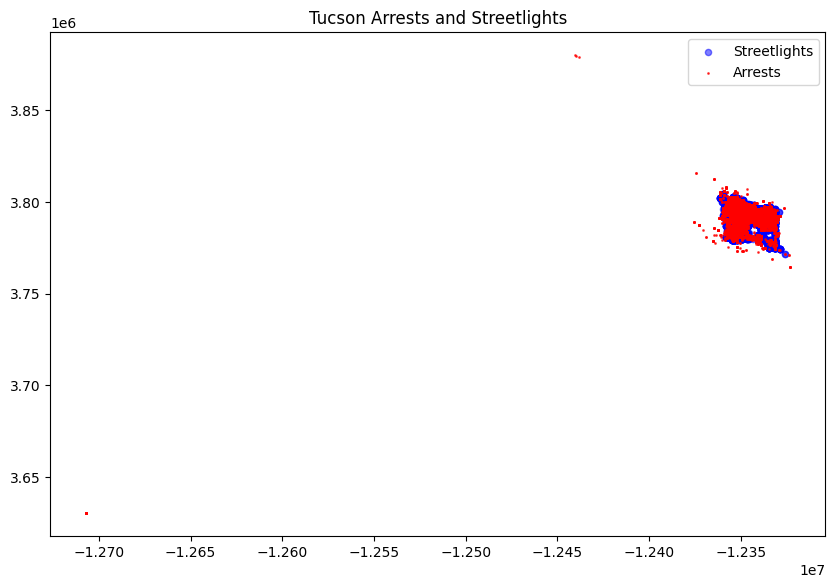

In [20]:
streetlights_gdf = streetlights_gdf.to_crs(epsg=3857)
arrests_gdf = arrests_gdf.to_crs(epsg=3857)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot streetlights
streetlights_gdf.plot(ax=ax, color='blue', markersize=20, alpha=0.5, label='Streetlights')

# Plot arrests
arrests_gdf.plot(ax=ax, color='red', markersize=1, alpha=0.7, label='Arrests')

# Set the aspect ratio to equal to ensure consistent scaling
ax.set_aspect('equal')

plt.title('Tucson Arrests and Streetlights')
plt.legend()
plt.show()

As soon as I add the arrests, the streetlights seem to disappear. However, noticing the outliers, I believe that the outliers are so far away that the streetlights are too small. To double check, I make the arrests dots smaller and immediately, I can see the blue. I change the data to filter out the outliers.

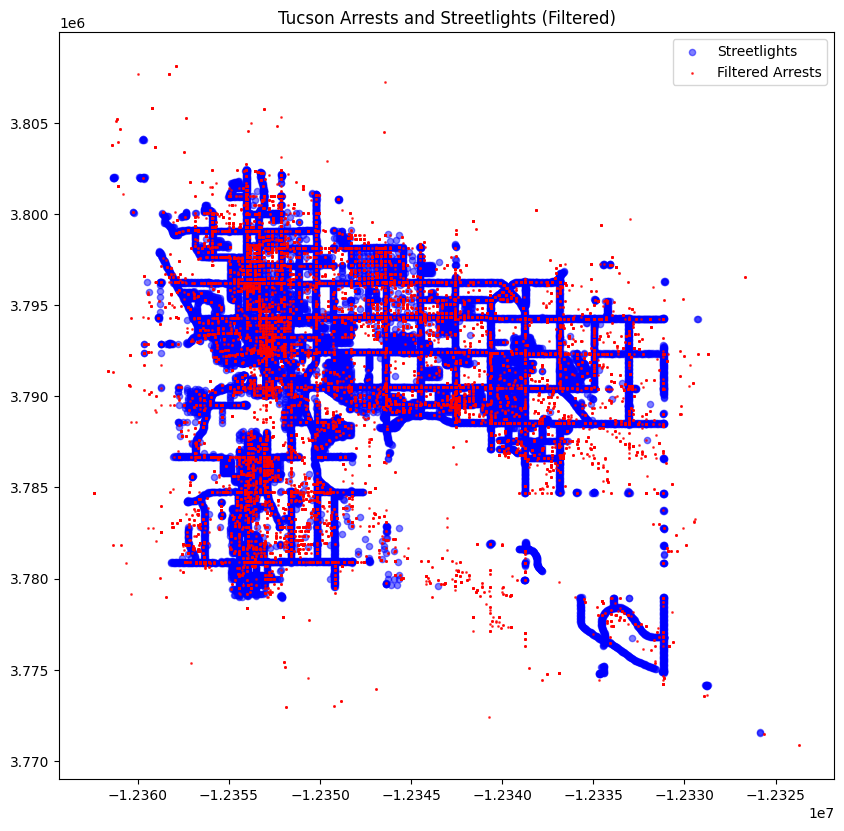

In [ ]:
# Calculate the bounds for latitude and longitude from the streetlights dataset
lat_min, lat_max = streetlights_df['latitude'].min(), streetlights_df['latitude'].max()
lon_min, lon_max = streetlights_df['longitude'].min(), streetlights_df['longitude'].max()

# Define an acceptable margin to include nearby arrests
lat_margin = 0.01
lon_margin = 0.01

# Filter arrests to be within the bounds (with a small margin)
arrests_filtered_df = arrests_df[
    (arrests_df['latitude'] >= lat_min - lat_margin) & (arrests_df['latitude'] <= lat_max + lat_margin) &
    (arrests_df['longitude'] >= lon_min - lon_margin) & (arrests_df['longitude'] <= lon_max + lon_margin)
]

# Create geometry columns from filtered arrest latitude and longitude
arrests_geometry_filtered = [Point(xy) for xy in zip(arrests_filtered_df['longitude'], arrests_filtered_df['latitude'])]

# Create GeoDataFrame for filtered arrests
arrests_gdf_filtered = gpd.GeoDataFrame(arrests_filtered_df, geometry=arrests_geometry_filtered, crs="EPSG:4326")

# Reproject to EPSG:3857
arrests_gdf_filtered = arrests_gdf_filtered.to_crs(epsg=3857)

# Create a plot again with filtered arrests
fig, ax = plt.subplots(figsize=(10, 10))

# Plot streetlights
streetlights_gdf.plot(ax=ax, color='blue', markersize=20, alpha=0.5, label='Streetlights')

# Plot filtered arrests
arrests_gdf_filtered.plot(ax=ax, color='red', markersize=1, alpha=0.7, label='Filtered Arrests')

# Set the aspect ratio to equal to ensure consistent scaling
ax.set_aspect('equal')

plt.title('Tucson Arrests and Streetlights (Filtered)')
plt.legend()
plt.show()

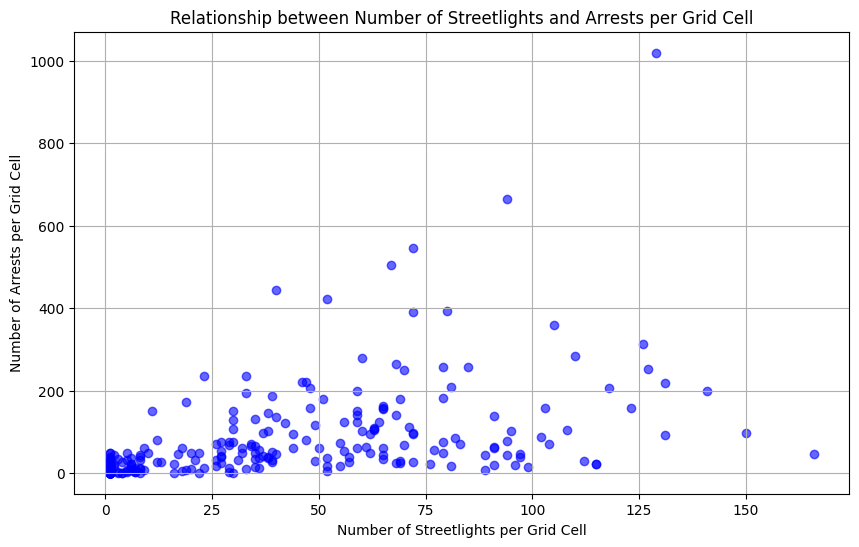

In [21]:
import numpy as np
from shapely.geometry import box

# Assuming the streetlights_gdf and arrests_gdf are already created and projected in EPSG:3857 as in previous steps

# Limit the bounding box to a smaller subsection of Tucson
xmin, ymin, xmax, ymax = -1.235e7, 3.78e6, -1.233e7, 3.80e6

# Create grid cells across the limited bounding box
num_cells_x = 20
num_cells_y = 20

x_points = np.linspace(xmin, xmax, num_cells_x)
y_points = np.linspace(ymin, ymax, num_cells_y)

# Create a list to hold the polygons for the grid cells
grid_cells = []
for x0 in x_points[:-1]:
    for y0 in y_points[:-1]:
        x1 = x0 + (x_points[1] - x_points[0])
        y1 = y0 + (y_points[1] - y_points[0])
        grid_cells.append(box(x0, y0, x1, y1))

# Create a GeoDataFrame for the grid
grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=streetlights_gdf.crs)

# Reset index to prevent conflicts
grid.reset_index(drop=True, inplace=True)
arrests_gdf.reset_index(drop=True, inplace=True)
streetlights_gdf.reset_index(drop=True, inplace=True)

# Drop 'index_right' column if it already exists to prevent conflicts
if 'index_right' in grid.columns:
    grid.drop(columns=['index_right'], inplace=True)
if 'index_right' in arrests_gdf.columns:
    arrests_gdf.drop(columns=['index_right'], inplace=True)
if 'index_right' in streetlights_gdf.columns:
    streetlights_gdf.drop(columns=['index_right'], inplace=True)

# Spatial join to count streetlights per grid cell
grid_with_streetlights = gpd.sjoin(grid, streetlights_gdf, how='left', predicate='contains', lsuffix='left', rsuffix='right')
streetlight_counts_per_cell = grid_with_streetlights.groupby(grid_with_streetlights.index).size().reset_index(name='light_count')

# Spatial join to count arrests per grid cell
grid_with_arrests = gpd.sjoin(grid, arrests_gdf, how='left', predicate='contains', lsuffix='left', rsuffix='right')
arrest_counts_per_cell = grid_with_arrests.groupby(grid_with_arrests.index).size().reset_index(name='arrest_count')

# Merge the counts into a single DataFrame
grid_df = grid.copy()
grid_df = grid_df.merge(streetlight_counts_per_cell, left_index=True, right_on='index', how='left')
grid_df = grid_df.merge(arrest_counts_per_cell, left_index=True, right_on='index', how='left')

# Fill NaN values with 0 for light and arrest counts
grid_df['light_count'] = grid_df['light_count'].fillna(0)
grid_df['arrest_count'] = grid_df['arrest_count'].fillna(0)

# Scatter Plot to compare number of streetlights and arrests
plt.figure(figsize=(10, 6))
plt.scatter(grid_df['light_count'], grid_df['arrest_count'], alpha=0.6, color='blue')

plt.xlabel('Number of Streetlights per Grid Cell')
plt.ylabel('Number of Arrests per Grid Cell')
plt.title('Relationship between Number of Streetlights and Arrests per Grid Cell')
plt.grid(True)
plt.show()

In [22]:
correlation = grid_df['light_count'].corr(grid_df['arrest_count'])
print(f"Correlation: {correlation}")

Correlation: 0.5605672071759873


This offers way more information. Looking at the scatterplot and the correlation, the relationship between arrests and how many streetlights in the area does not have a very strong relationship.

However, there is a medium positive relationship. This means that generally, as the streetlights increase, the number of arrests also tends to increase. Does this mean that more streetlights equals more crime and arrests? Most likely not.

Instead, it's more likely to mean that there's an association between lights and arrests. Perhaps the relationship is indicating that areas with more streetlights tend to be places with more activity. And places with more activity might be seeing higher arrest rates.